In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## First we have to read the dataset we are working with into a dataframe

In [2]:
workout_data=pd.read_csv("weightlifting_721_workouts.csv")
workout_data.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Distance,Seconds,Notes,Workout Notes
0,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),1,135.0,8,0.0,0,NaN,NaN
1,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),2,135.0,8,0.0,0,NaN,NaN
2,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),3,135.0,5,0.0,0,NaN,NaN
3,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),4,185.0,7,0.0,0,NaN,NaN
4,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),5,230.0,8,0.0,0,NaN,NaN


In [3]:
workout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9932 non-null   object 
 1   Workout Name   9932 non-null   object 
 2   Exercise Name  9932 non-null   object 
 3   Set Order      9932 non-null   int64  
 4   Weight         9932 non-null   float64
 5   Reps           9932 non-null   int64  
 6   Distance       9932 non-null   float64
 7   Seconds        9932 non-null   int64  
 8   Notes          7 non-null      object 
 9   Workout Notes  3 non-null      object 
dtypes: float64(2), int64(3), object(5)
memory usage: 776.1+ KB


### Once we use .info() to find null counts in the columns, we replace those nulls with "unknown" so the columns are not missing any values

In [4]:
workout_data['Notes'].fillna('Unknown', inplace=True)
workout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9932 non-null   object 
 1   Workout Name   9932 non-null   object 
 2   Exercise Name  9932 non-null   object 
 3   Set Order      9932 non-null   int64  
 4   Weight         9932 non-null   float64
 5   Reps           9932 non-null   int64  
 6   Distance       9932 non-null   float64
 7   Seconds        9932 non-null   int64  
 8   Notes          9932 non-null   object 
 9   Workout Notes  3 non-null      object 
dtypes: float64(2), int64(3), object(5)
memory usage: 776.1+ KB


In [5]:
workout_data['Workout Notes'].fillna('Unknown', inplace=True)
workout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9932 non-null   object 
 1   Workout Name   9932 non-null   object 
 2   Exercise Name  9932 non-null   object 
 3   Set Order      9932 non-null   int64  
 4   Weight         9932 non-null   float64
 5   Reps           9932 non-null   int64  
 6   Distance       9932 non-null   float64
 7   Seconds        9932 non-null   int64  
 8   Notes          9932 non-null   object 
 9   Workout Notes  9932 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 776.1+ KB


In [6]:
workout_data.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Distance,Seconds,Notes,Workout Notes
0,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),1,135.0,8,0.0,0,Unknown,Unknown
1,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),2,135.0,8,0.0,0,Unknown,Unknown
2,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),3,135.0,5,0.0,0,Unknown,Unknown
3,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),4,185.0,7,0.0,0,Unknown,Unknown
4,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),5,230.0,8,0.0,0,Unknown,Unknown


### Now we have convert our date to date_time

In [7]:
workout_data['Date']=pd.to_datetime(workout_data['Date'])
workout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9932 non-null   datetime64[ns]
 1   Workout Name   9932 non-null   object        
 2   Exercise Name  9932 non-null   object        
 3   Set Order      9932 non-null   int64         
 4   Weight         9932 non-null   float64       
 5   Reps           9932 non-null   int64         
 6   Distance       9932 non-null   float64       
 7   Seconds        9932 non-null   int64         
 8   Notes          9932 non-null   object        
 9   Workout Notes  9932 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 776.1+ KB


## Statistical numbers about our dataset

In [8]:
workout_data['Set Order'].describe()

count    9932.000000
mean        3.109847
std         1.986896
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: Set Order, dtype: float64

In [9]:
workout_data['Weight'].describe()

count    9932.000000
mean      171.967540
std       117.993654
min         0.000000
25%        85.000000
50%       165.000000
75%       237.500000
max      2956.000000
Name: Weight, dtype: float64

In [10]:
workout_data['Reps'].describe()

count    9932.000000
mean        8.688884
std         3.092516
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        60.000000
Name: Reps, dtype: float64

In [11]:
workout_data['Distance'].describe()

count    9932.000000
mean        0.089011
std         5.277076
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       363.000000
Name: Distance, dtype: float64

In [12]:
workout_data['Seconds'].describe()

count    9932.000000
mean        1.048429
std        29.424260
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1260.000000
Name: Seconds, dtype: float64

In [13]:
workout_data.corr()

,Set Order,Weight,Reps,Distance,Seconds
Set Order,1.000000,0.308188,-0.254249,-0.016732,-0.037680
Weight,0.308188,1.000000,-0.376985,-0.024586,-0.051936
Reps,-0.254249,-0.376985,1.000000,-0.047397,-0.100122
Distance,-0.016732,-0.024586,-0.047397,1.000000,0.183242
Seconds,-0.037680,-0.051936,-0.100122,0.183242,1.000000


# Once we have cleaned up our dataset, we are ready to visualize it and make graphs

#### The scatter plot shows a tight spread from 0 to 20 reps, and 0 to 500 pounds, with an outlier at 2,956 pounds. We believe this outlier is a typo, and the point should be 295.6 pounds

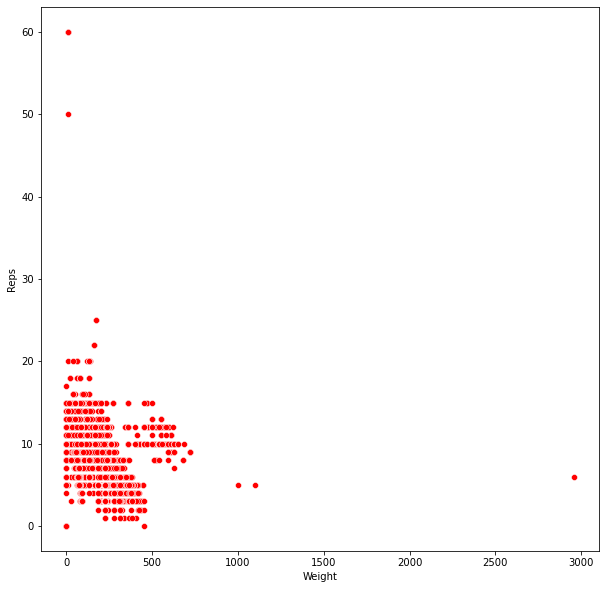

In [14]:
fig= plt.figure(figsize=(10,10))
scatter_plot=sns.scatterplot(x='Weight',
                             y='Reps',
                             data=workout_data,
                             color='red')


#### These pari plots compare all the columns we have in our dataset to each other, all are pretty uniform and a few outliers

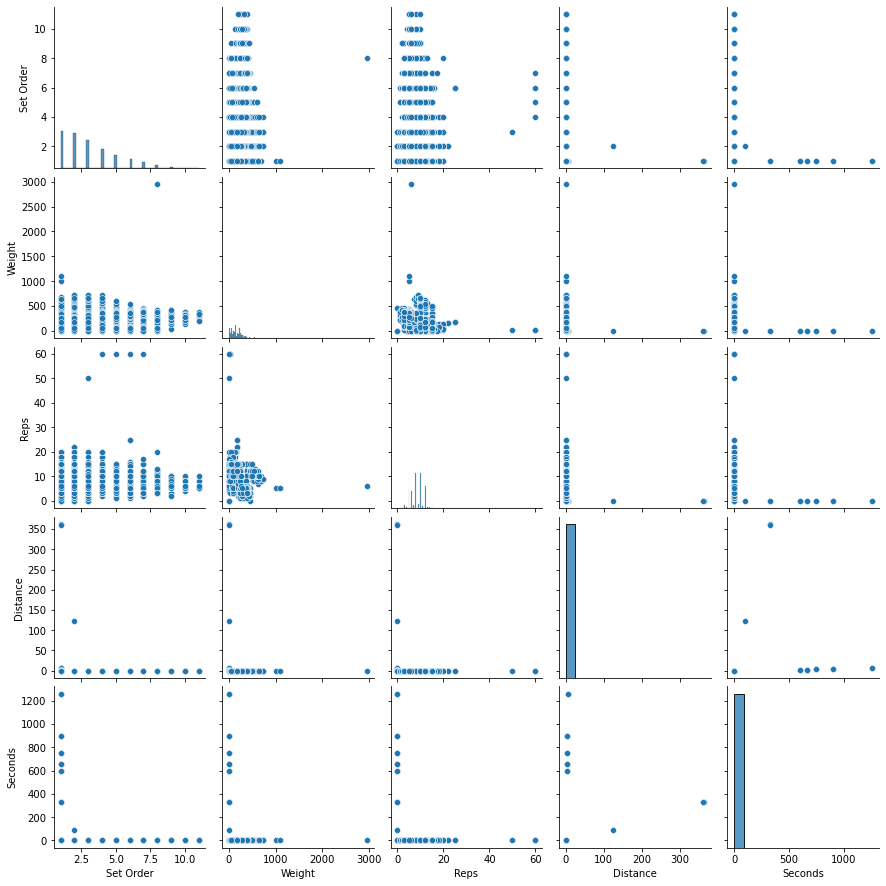

In [15]:
pair_plot=sns.pairplot(workout_data)
pair_plot

#### This bar chart shows a random sample of 15 data points, as we can see, as the number of reps increases, the weight usually decreases

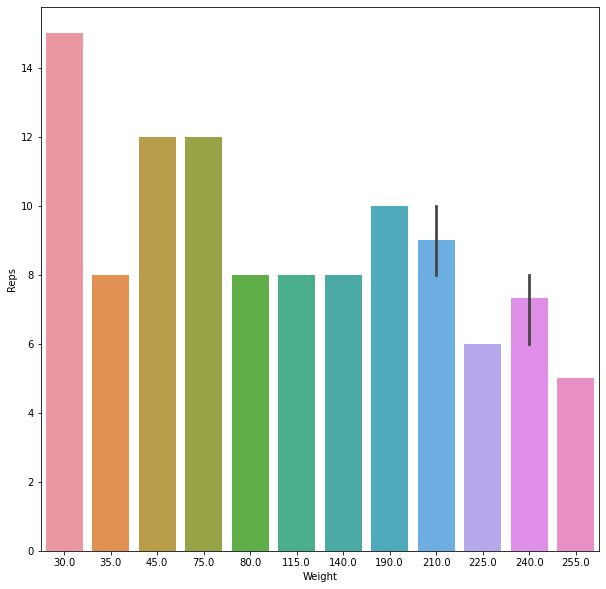

In [16]:
workout=workout_data.sample(15)
fig= plt.figure(figsize=(10,10))
bar_plot=sns.barplot(x='Weight', y='Reps', data=workout)

#### This lm plot shows a scatter similar to the scatter plot with an outlier at 2,956 pounds and an error line going negative

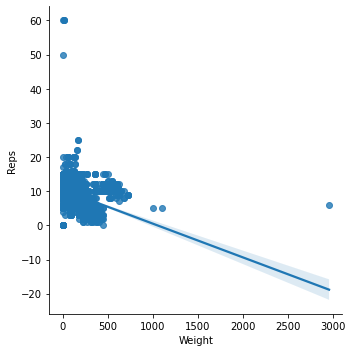

In [17]:
lm_plot=sns.lmplot(x='Weight',
                   y='Reps',
                   data=workout_data)

#### This box plot shows our spread is pretty unform around the 40 to 250 pound mark, with a few outliers around 1,000 and a single outlier at 2,956

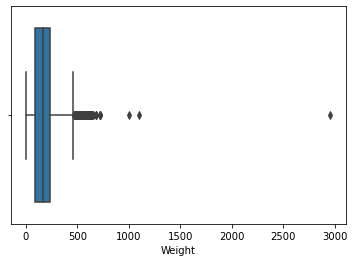

In [18]:
box_plot=sns.boxplot(x=workout_data['Weight'])

#### This joint plot combines a scatter plot with an lm plot to show our spread is strong around the 0 to 20 rep range and 0 to 500 pounds range

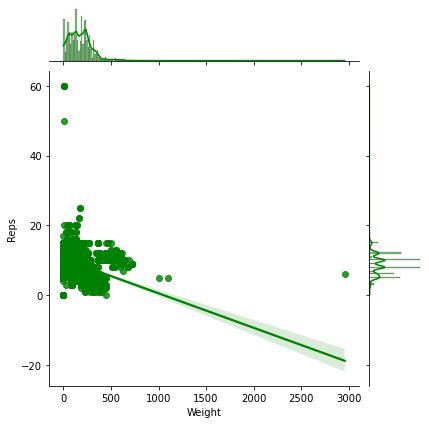

In [19]:
joint_plot=sns.jointplot(x='Weight',
                         y='Reps',
                        data=workout_data,
                        kind='reg',
                        color='green')

# Braden Heuglin and Zac Pilbean
## TP1, Version 1
### Spring 2023 Semester